# Cisco - Ariel University API Security Detection Challenge 2023

## Student ID: 207276775
GitHub project: https://github.com/RazElbaz/API_security_challenge

The site that helped me find algorithms:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

### Imports and global settings

In [1]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 4 # Options are [1, 2, 3, 4]
test_type = 'attack_type' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.headers.Location,response.status_code,response.body,request.headers.Sec-Ch-Ua-Platform,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,de-CH,none,same-origin,no-store,?1,document,['ck=FJRAiycx_3ekqPVGrPhoLGnQ_MKj1ittQ-MCq2zXC...,"Sun, 18 Dec 2022 01:27:48 GMT",GET,http://127.0.0.1:5000/forum?message=%3C%2Fh2%3...,,XSS,302 FOUND,text/html; charset=utf-8,199,/forum,302,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,"en-US,en;q=0.5",none,websocket,no-store,?1,document,['cid=y03gw4TI3ch-xC1BinML6NAIN0DQNEwmnuyTkVoL...,"Sun, 18 Dec 2022 01:36:14 GMT",GET,http://127.0.0.1:5000/greet/Capito,,NaN,200 OK,text/html; charset=utf-8,22,NaN,200,text/html; charset=utf-8,"""Windows""",NaN,NaN,NaN,NaN
2,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GET,http://127.0.0.1:5000/bookstore,,NaN,200 OK,application/json,41,NaN,200,"{""message"": ""Welcome to the Book Store!""}",NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...,"gzip, deflate, br",*/*,keep-alive,?0,de,none,websocket,max-age=0,?1,document,['ck=dratLqJCNUT6dOw-tyeIHFWXCwmuoWbNq9b70hwkv...,"Sun, 18 Dec 2022 01:30:29 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,Log Forging,401 UNAUTHORIZED,application/json,41,NaN,401,"{""error"": ""Not a number failed to parse""}",NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,?1,de-CH,none,websocket,max-age=0,?1,document,['cid=iBjOK5E1jqEbufkmhwMyCqp-6teXdsEeLrZLl3Ub...,"Sun, 18 Dec 2022 01:41:45 GMT",POST,http://127.0.0.1:5000/categories/check/all?id=...,MkdXwyHaWCdnLhoXJDzY,NaN,200 OK,application/json,871,NaN,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...","""Windows""",20,NaN,NaN,NaN


### Basic dataset label arrangements

In [2]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.headers.Location,response.status_code,response.body,request.headers.Sec-Ch-Ua-Platform,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,de-CH,none,same-origin,no-store,?1,document,['ck=FJRAiycx_3ekqPVGrPhoLGnQ_MKj1ittQ-MCq2zXC...,"Sun, 18 Dec 2022 01:27:48 GMT",GET,http://127.0.0.1:5000/forum?message=%3C%2Fh2%3...,,302 FOUND,text/html; charset=utf-8,199,/forum,302,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN,XSS,Malware
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,"en-US,en;q=0.5",none,websocket,no-store,?1,document,['cid=y03gw4TI3ch-xC1BinML6NAIN0DQNEwmnuyTkVoL...,"Sun, 18 Dec 2022 01:36:14 GMT",GET,http://127.0.0.1:5000/greet/Capito,,200 OK,text/html; charset=utf-8,22,NaN,200,text/html; charset=utf-8,"""Windows""",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GET,http://127.0.0.1:5000/bookstore,,200 OK,application/json,41,NaN,200,"{""message"": ""Welcome to the Book Store!""}",NaN,NaN,NaN,NaN,NaN,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...,"gzip, deflate, br",*/*,keep-alive,?0,de,none,websocket,max-age=0,?1,document,['ck=dratLqJCNUT6dOw-tyeIHFWXCwmuoWbNq9b70hwkv...,"Sun, 18 Dec 2022 01:30:29 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,401 UNAUTHORIZED,application/json,41,NaN,401,"{""error"": ""Not a number failed to parse""}",NaN,NaN,NaN,NaN,NaN,Log Forging,Malware
4,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,?1,de-CH,none,websocket,max-age=0,?1,document,['cid=iBjOK5E1jqEbufkmhwMyCqp-6teXdsEeLrZLl3Ub...,"Sun, 18 Dec 2022 01:41:45 GMT",POST,http://127.0.0.1:5000/categories/check/all?id=...,MkdXwyHaWCdnLhoXJDzY,200 OK,application/json,871,NaN,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...","""Windows""",20,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182762,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,?1,"en-US,en;q=0.5",none,same-origin,max-age=0,?1,document,['ttauth=vDA_pRaPgv5BX9UlIvE2-G5JEBJe4PvEXroOv...,"Sun, 18 Dec 2022 01:37:37 GMT",GET,http://127.0.0.1:5000/categories/check/name/Pr...,,200 OK,application/json,101,NaN,200,"{""category_id"": ""7"", ""category_name"": ""Produce...","""Windows""",NaN,NaN,NaN,NaN,Benign,Benign
182763,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,?1,de-CH,none,same-origin,no-cache,?1,document,['cid=YQAQXREK77h1CZXs6lAoKHvBgZfKuaV4aEMuONaI...,"Sun, 18 Dec 2022 01:20:52 GMT",GET,http://127.0.0.1:5000/login/user?username=Sowi...,,401 UNAUTHORIZED,application/json,26,NaN,401,"{""error"": ""Access denied""}","""Windows""",NaN,NaN,NaN,NaN,Benign,Benign
182764,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,max-age=0,?1,document,['ck=Y0mqGJ92oxXkiQMuhlP3oypr6p0wBFCvveiuxxe-R...,"Sun, 18 Dec 2022 01:22:10 GMT",GET,http://127.0.0.1:5000/forum?message=%3C%2Fp%3E...,,302 FOUND,text/html; c

In [3]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')
    
# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.headers.Location,response.status_code,response.body,request.headers.Sec-Ch-Ua-Platform,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,de-CH,none,same-origin,no-store,?1,document,['ck=FJRAiycx_3ekqPVGrPhoLGnQ_MKj1ittQ-MCq2zXC...,"Sun, 18 Dec 2022 01:27:48 GMT",GET,http://127.0.0.1:5000/forum?message=%3C%2Fh2%3...,,302 FOUND,text/html; charset=utf-8,199,/forum,302,text/html; charset=utf-8,None,None,None,None,None,XSS,Malware
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,?0,"en-US,en;q=0.5",none,websocket,no-store,?1,document,['cid=y03gw4TI3ch-xC1BinML6NAIN0DQNEwmnuyTkVoL...,"Sun, 18 Dec 2022 01:36:14 GMT",GET,http://127.0.0.1:5000/greet/Capito,,200 OK,text/html; charset=utf-8,22,None,200,text/html; charset=utf-8,"""Windows""",None,None,None,None,Benign,Benign
2,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,None,None,None,None,None,None,None,None,None,GET,http://127.0.0.1:5000/bookstore,,200 OK,application/json,41,None,200,"{""message"": ""Welcome to the Book Store!""}",None,None,None,None,None,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...,"gzip, deflate, br",*/*,keep-alive,?0,de,none,websocket,max-age=0,?1,document,['ck=dratLqJCNUT6dOw-tyeIHFWXCwmuoWbNq9b70hwkv...,"Sun, 18 Dec 2022 01:30:29 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,401 UNAUTHORIZED,application/json,41,None,401,"{""error"": ""Not a number failed to parse""}",None,None,None,None,None,Log Forging,Malware
4,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,?1,de-CH,none,websocket,max-age=0,?1,document,['cid=iBjOK5E1jqEbufkmhwMyCqp-6teXdsEeLrZLl3Ub...,"Sun, 18 Dec 2022 01:41:45 GMT",POST,http://127.0.0.1:5000/categories/check/all?id=...,MkdXwyHaWCdnLhoXJDzY,200 OK,application/json,871,None,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...","""Windows""",20,None,None,None,Benign,Benign


In [4]:
# #Median of two seperate columns
# df['request.headers.Accept-Encoding',
#                 'request.headers.Connection',
#                 'request.headers.Host',
#                 'request.headers.Accept',
#                 'request.method',
#                 'request.headers.Accept-Language',
#                 'request.headers.Sec-Fetch-Site',
#                 'request.headers.Sec-Fetch-Mode',
#                 'request.headers.Sec-Fetch-Dest',
#                 'request.headers.Sec-Fetch-User',
#                 'response.status',
#                'request.headers.User-Agent',
#                     'request.headers.Set-Cookie',
#                     'request.headers.Date',
#                     'request.url',
#                     'response.headers.Content-Type',
#                     'response.body',
#                     'response.headers.Location',
#                     'request.headers.Content-Length',
#                     'request.headers.Cookie',
#                     'response.headers.Set-Cookie',
#                     'request.headers.Sec-Ch-Ua-Mobile','request.body',
#                     'response.headers.Content-Length',
#                     'request.headers.Date'
  
#   "request.headers.Host",                         
# "request.headers.User-Agent",                 
# "request.headers.Accept-Encoding",             
# "request.headers.Accept",                     
# "request.headers.Connection",                    
# "request.headers.Sec-Ch-Ua-Mobile",            
# "request.headers.Accept-Language",                
# "request.headers.Sec-Fetch-Site",                 
# "request.headers.Sec-Fetch-Mode",
# "request.headers.Cache-Control",               
# "request.headers.Sec-Fetch-User",              
# "request.headers.Sec-Fetch-Dest",                 
# "request.headers.Set-Cookie",                  
# "request.method",                                
# "request.url",                                 
# "response.status",                              
# "response.headers.Content-Type",                
# "response.headers.Location",                  
# "response.status_code",                           
# "response.body",                             
# request.headers.Sec-Ch-Ua-Platform",         
# request.headers.Content-Length",            
# request.headers.Cookie",                     
# response.headers.Set-Cookie",              
# request.headers.Upgrade-Insecure-Requests",    
# attack_type                                 
# label                                      

  
  
  
#   ].median()

In [5]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                'request.headers.Connection',
                'request.headers.Host',
                'request.headers.Accept',
                'request.method',
                'request.headers.Accept-Language',
                'request.headers.Sec-Fetch-Site',
                'request.headers.Sec-Fetch-Mode',
                'request.headers.Sec-Fetch-Dest',
                'request.headers.Sec-Fetch-User',
                'response.status',
                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                    'request.headers.Set-Cookie',
                    'request.headers.Date',
                    'request.url',
                    'response.headers.Content-Type',
                    'response.body',
                    'response.headers.Location',
                    'request.headers.Content-Length',
                    'request.headers.Cookie',
                    'response.headers.Set-Cookie'
                    ]

COLUMNS_TO_REMOVE = ['request.body',
                    'response.headers.Content-Length',
                    'request.headers.Date',
                    'request.headers.Cache-Control',
                    'request.headers.Upgrade-Insecure-Requests',
                    'request.headers.Sec-Ch-Ua-Platform']

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
        
#     def a(row):  
#         return int(df['request.headers.Sec-Ch-Ua-Mobile'][1][1])
    def cat(row):  
        if row['request.headers.Sec-Ch-Ua-Mobile'] == '?0':
            return 0
        if row['request.headers.Sec-Ch-Ua-Mobile'] == '?1':
            return 1
        return 0

    df['request.headers.Sec-Ch-Ua-Mobile'] = df.apply(lambda row: cat(row), axis=1)

#     for column in df.columns[['request.headers.Sec-Ch-Ua-Mobile'].tolist():
#         df[column].fillna(int(df['request.headers.Sec-Ch-Ua-Mobile'][i][1]))
#         df['request.headers.Sec-Ch-Ua-Mobile'] = df.apply(lambda row: int(df['request.headers.Sec-Ch-Ua-Mobile'][i][1]), axis=1)
                             
#     for i in df['request.headers.Sec-Ch-Ua-Mobile'].length()
#         df['request.headers.Sec-Ch-Ua-Mobile']=int(df['request.headers.Sec-Ch-Ua-Mobile'][i][1])

    return df

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.headers.Location,response.status_code,response.body,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie,attack_type,label
0,0,0.000000,1,0,0,0,2,1,1,0,1,-0.359211,0,0.577350,2,-1.0,0.0,302,-1.000000,-1.0,-1.0,-1.0,XSS,Malware
1,0,0.500000,1,0,0,0,3,1,2,0,1,-0.861640,0,1.000000,0,-1.0,-1.0,200,-1.000000,-1.0,-1.0,-1.0,Benign,Benign
2,0,0.577350,0,0,0,0,0,0,0,1,0,-1.000000,0,0.707107,0,-1.0,-1.0,200,0.000000,-1.0,-1.0,-1.0,Benign,Benign
3,0,-0.816497,1,0,0,0,1,1,2,0,1,-0.426401,0,0.000000,4,-1.0,-1.0,401,0.408248,-1.0,-1.0,-1.0,Log Forging,Malware
4,0,0.632456,631,0,0,1,2,1,2,0,1,-0.880451,1,0.377964,0,-1.0,-1.0,200,-0.255551,-1.0,-1.0,-1.0,Benign,Benign


In [6]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182767 entries, 0 to 182766
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   request.headers.Host              182767 non-null  int32  
 1   request.headers.User-Agent        182767 non-null  float64
 2   request.headers.Accept-Encoding   182767 non-null  int32  
 3   request.headers.Accept            182767 non-null  int32  
 4   request.headers.Connection        182767 non-null  int32  
 5   request.headers.Sec-Ch-Ua-Mobile  182767 non-null  int64  
 6   request.headers.Accept-Language   182767 non-null  int32  
 7   request.headers.Sec-Fetch-Site    182767 non-null  int32  
 8   request.headers.Sec-Fetch-Mode    182767 non-null  int32  
 9   request.headers.Sec-Fetch-User    182767 non-null  int32  
 10  request.headers.Sec-Fetch-Dest    182767 non-null  int32  
 11  request.headers.Set-Cookie        182767 non-null  f

In [7]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept', 'request.headers.Connection', 'request.headers.Sec-Ch-Ua-Mobile', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.headers.Location', 'response.status_code', 'response.body', 'request.headers.Content-Length', 'request.headers.Cookie', 'response.headers.Set-Cookie']


request.headers.Host                  int32
request.headers.User-Agent          float64
request.headers.Accept-Encoding       int32
request.headers.Accept                int32
request.headers.Connection            int32
request.headers.Sec-Ch-Ua-Mobile      int64
request.headers.Accept-Language       int32
request.headers.Sec-Fetch-Site        int32
request.headers.Sec-Fetch-Mode        int32
request.headers.Sec-Fetch-User        int32
request.headers.Sec-Fetch-Dest        int32
request.headers.Set-Cookie          float64
request.method                        int32
request.url                         float64
response.status                       int32
response.headers.Content-Type       float64
response.headers.Location           float64
response.status_code                  int64
response.body                       float64
request.headers.Content-Length      float64
request.headers.Cookie              float64
response.headers.Set-Cookie         float64
attack_type                     

## Train test split

In [8]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(150508, 22) (150508,)
(32259, 22) (32259,)


Counter({'XSS': 8017,
         'Benign': 143431,
         'Log Forging': 4037,
         'LOG4J': 3733,
         'SQL Injection': 7924,
         'RCE': 3944,
         'Cookie Injection': 7742,
         'Directory Traversal': 3939})

## Model choosing and fitting

## Result printout

In [9]:
def ResultPrintout(model):
    # We print our results
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    model_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(model_matrix, annot=True, cmap='Blues', fmt='g', 
                          xticklabels=np.unique(true_labels), 
                          yticklabels=np.unique(true_labels)) 

    # The heatmap is cool but this is the most important result
    print(model_report)

In [10]:
df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.headers.Location,response.status_code,response.body,request.headers.Content-Length,request.headers.Cookie,response.headers.Set-Cookie,attack_type,label
0,0,0.000000,1,0,0,0,2,1,1,0,1,-0.359211,0,0.577350,2,-1.0,0.0,302,-1.000000,-1.0,-1.0,-1.0,XSS,Malware
1,0,0.500000,1,0,0,0,3,1,2,0,1,-0.861640,0,1.000000,0,-1.0,-1.0,200,-1.000000,-1.0,-1.0,-1.0,Benign,Benign
2,0,0.577350,0,0,0,0,0,0,0,1,0,-1.000000,0,0.707107,0,-1.0,-1.0,200,0.000000,-1.0,-1.0,-1.0,Benign,Benign
3,0,-0.816497,1,0,0,0,1,1,2,0,1,-0.426401,0,0.000000,4,-1.0,-1.0,401,0.408248,-1.0,-1.0,-1.0,Log Forging,Malware
4,0,0.632456,631,0,0,1,2,1,2,0,1,-0.880451,1,0.377964,0,-1.0,-1.0,200,-0.255551,-1.0,-1.0,-1.0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182762,0,-0.408248,631,0,0,1,3,1,1,0,1,0.584472,0,0.000000,0,-1.0,-1.0,200,0.408248,-1.0,-1.0,-1.0,Benign,Benign
182763,0,-0.755929,1,0,0,1,2,1,1,0,1,-0.484182,0,0.774597,4,-1.0,-1.0,401,-0.577350,-1.0,-1.0,-1.0,Benign,Benign
182764,0,-0.755929,1,0,0,1,4,1,2,0,1,-0.577350,0,0.480384,2,-1.0,0.0,302,-1.000000,-1.0,-1.0,-1.0,XSS,Malware
182765,0,0.774597,1,0,0,1,4,1,1,0,1,-0.798621,0,0.000000,5,-1.0,-1.0,404,0.408248,-1.0,-1.0,-1.0,Benign,Benign


### Model 1- RandomForestClassifier()

[('Benign', 118115), ('Cookie Injection', 6376), ('Directory Traversal', 3244), ('LOG4J', 3074), ('Log Forging', 3324), ('RCE', 3248), ('SQL Injection', 6525), ('XSS', 6602)]
                     precision    recall  f1-score   support

             Benign    0.96577   0.97077   0.96826     25316
   Cookie Injection    0.99927   0.99780   0.99853      1366
Directory Traversal    0.73913   0.66043   0.69757       695
              LOG4J    0.87402   0.50531   0.64038       659
        Log Forging    0.70413   0.86115   0.77476       713
                RCE    0.97479   1.00000   0.98723       696
      SQL Injection    0.81153   0.82487   0.81815      1399
                XSS    0.95688   0.97244   0.96460      1415

           accuracy                        0.94767     32259
          macro avg    0.87819   0.84910   0.85619     32259
       weighted avg    0.94777   0.94767   0.94648     32259



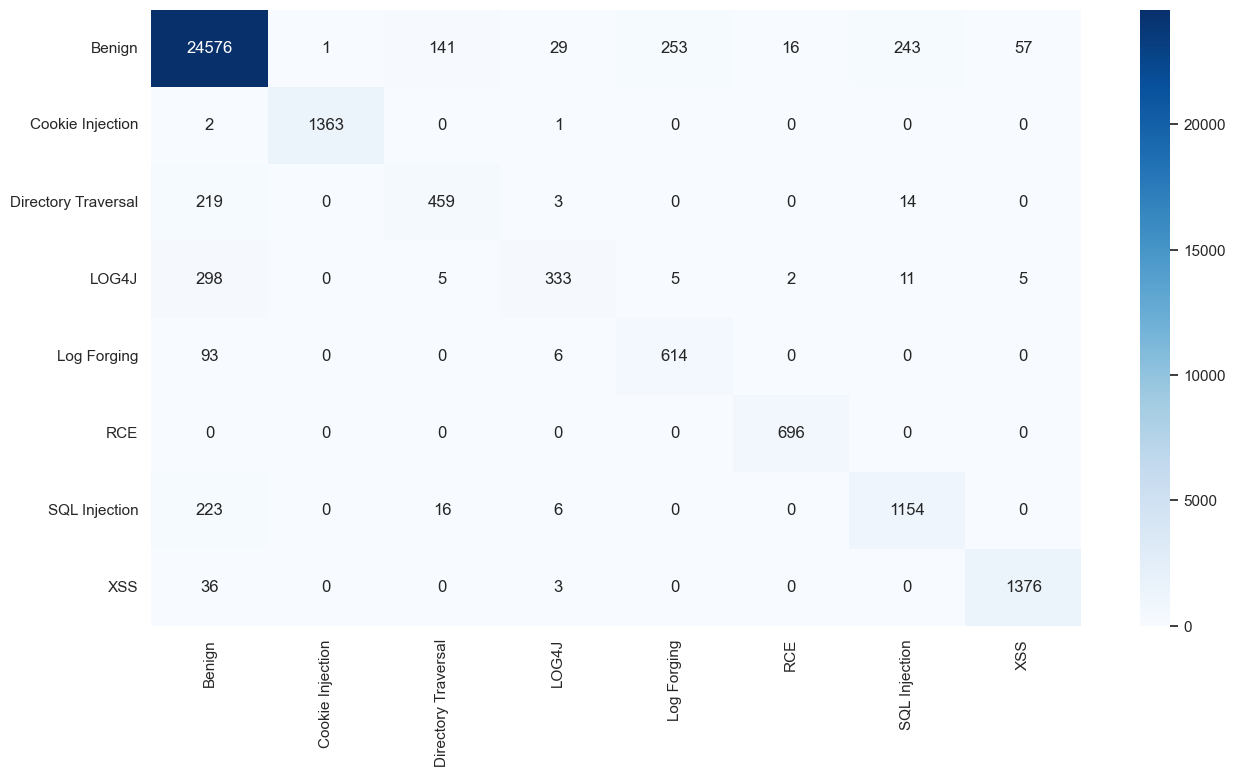

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier()

parameters = {"n_estimators": [100,200,300,400]}

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
clf = GridSearchCV(clf, parameters)
# Train Model
clf.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
clf = clf.best_estimator_
ResultPrintout(clf)

### Model 2- DecisionTreeClassifier()

[('Benign', 118115), ('Cookie Injection', 6376), ('Directory Traversal', 3244), ('LOG4J', 3074), ('Log Forging', 3324), ('RCE', 3248), ('SQL Injection', 6525), ('XSS', 6602)]
                     precision    recall  f1-score   support

             Benign    0.95631   0.97188   0.96403     25316
   Cookie Injection    1.00000   0.99780   0.99890      1366
Directory Traversal    0.96420   0.58129   0.72531       695
              LOG4J    0.97479   0.35205   0.51728       659
        Log Forging    0.70282   0.87237   0.77847       713
                RCE    1.00000   1.00000   1.00000       696
      SQL Injection    0.72226   0.74911   0.73544      1399
                XSS    0.95605   0.99929   0.97719      1415

           accuracy                        0.94185     32259
          macro avg    0.90955   0.81547   0.83708     32259
       weighted avg    0.94389   0.94185   0.93858     32259



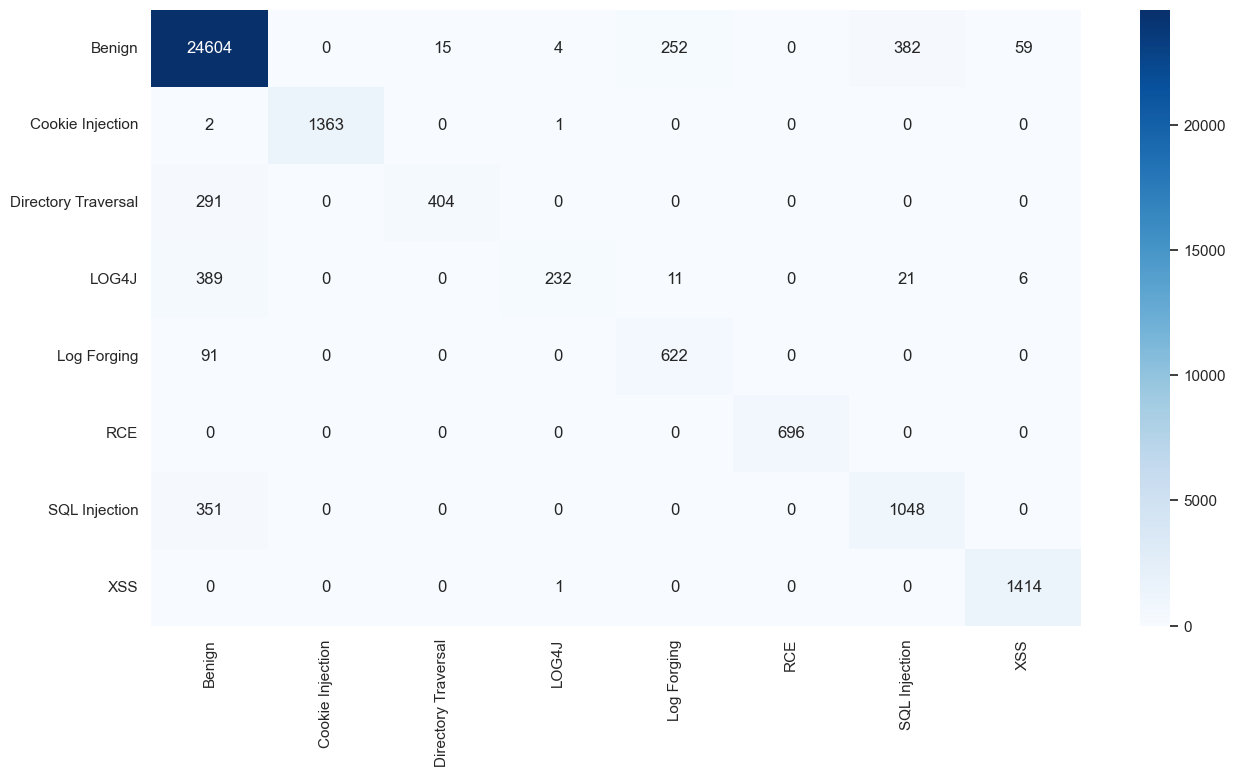

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# We choose our model of choice and set it's hyper parameters you can change anything
dtc = DecisionTreeClassifier()

#  The random_state in these algorithms controls the randomness involved during the node splitting process by searching for the best feature
parameters = {"random_state": [None,10,20,30,40,50,100,200,300],
             "splitter":["best", "random"],
             "max_depth":[1,2,3,4,5,6,7,8,9,10]
             }

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
dtc = GridSearchCV(dtc, parameters)
# Train Model
dtc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
dtc = dtc.best_estimator_
ResultPrintout(dtc)

### Model 3- GradientBoostingClassifier()

[('Benign', 118115), ('Cookie Injection', 6376), ('Directory Traversal', 3244), ('LOG4J', 3074), ('Log Forging', 3324), ('RCE', 3248), ('SQL Injection', 6525), ('XSS', 6602)]
                     precision    recall  f1-score   support

             Benign    0.96893   0.97938   0.97413     25316
   Cookie Injection    0.99853   0.99780   0.99817      1366
Directory Traversal    0.95327   0.58705   0.72663       695
              LOG4J    0.95954   0.50379   0.66070       659
        Log Forging    0.70863   0.97896   0.82214       713
                RCE    1.00000   0.99713   0.99856       696
      SQL Injection    0.87636   0.86133   0.86878      1399
                XSS    0.95667   0.99859   0.97718      1415

           accuracy                        0.95809     32259
          macro avg    0.92774   0.86300   0.87829     32259
       weighted avg    0.96002   0.95809   0.95614     32259



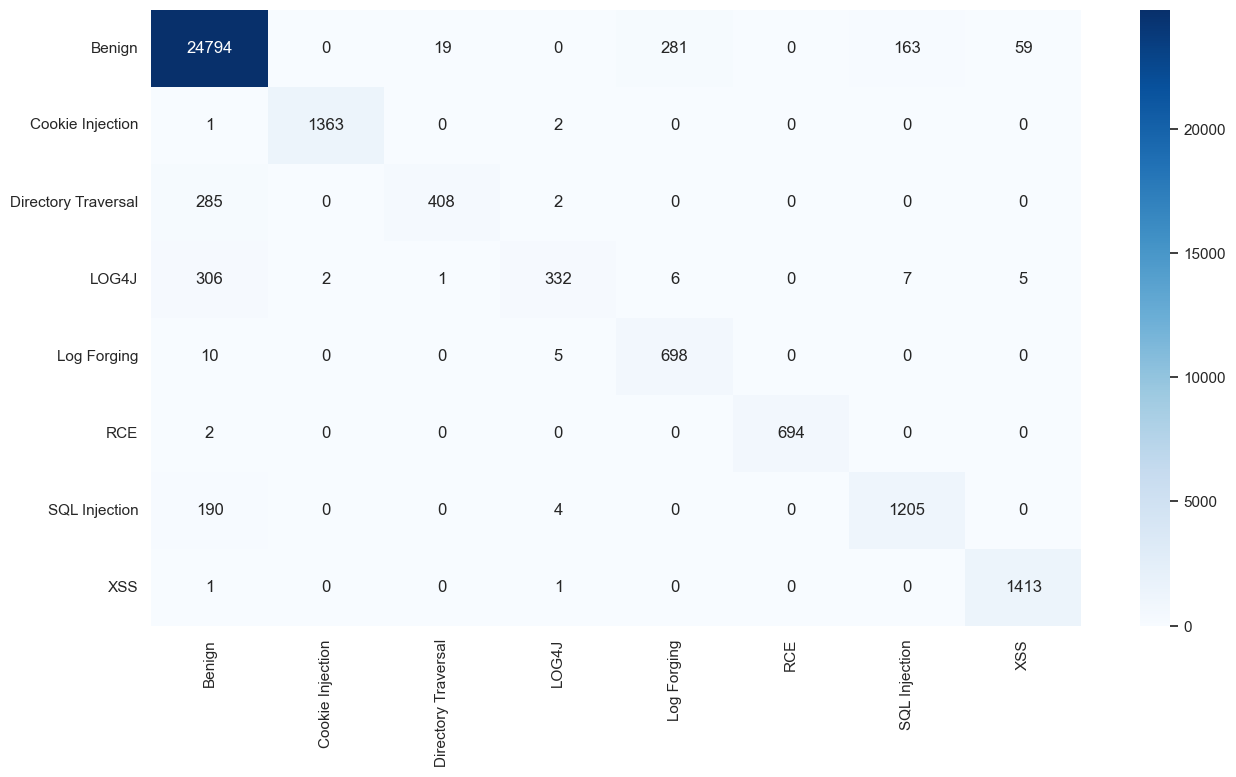

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier
# We choose our model of choice and set it's hyper parameters you can change anything
gbc = GradientBoostingClassifier()

parameters = {"n_estimators": [50,100,200,300,350,400]}

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
gbc = GridSearchCV(gbc, parameters)
# Train Model
gbc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
gbc = gbc.best_estimator_
ResultPrintout(gbc)


### Model 4- AdaBoostClassifier()

[('Benign', 118115), ('Cookie Injection', 6376), ('Directory Traversal', 3244), ('LOG4J', 3074), ('Log Forging', 3324), ('RCE', 3248), ('SQL Injection', 6525), ('XSS', 6602)]


C:\Users\97252\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97252\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97252\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

             Benign    0.81893   0.99613   0.89888     25316
   Cookie Injection    1.00000   0.99780   0.99890      1366
Directory Traversal    0.00000   0.00000   0.00000       695
              LOG4J    0.00000   0.00000   0.00000       659
        Log Forging    0.00980   0.00140   0.00245       713
                RCE    0.00000   0.00000   0.00000       696
      SQL Injection    0.00000   0.00000   0.00000      1399
                XSS    0.00000   0.00000   0.00000      1415

           accuracy                        0.82402     32259
          macro avg    0.22859   0.24942   0.23753     32259
       weighted avg    0.68523   0.82402   0.74777     32259



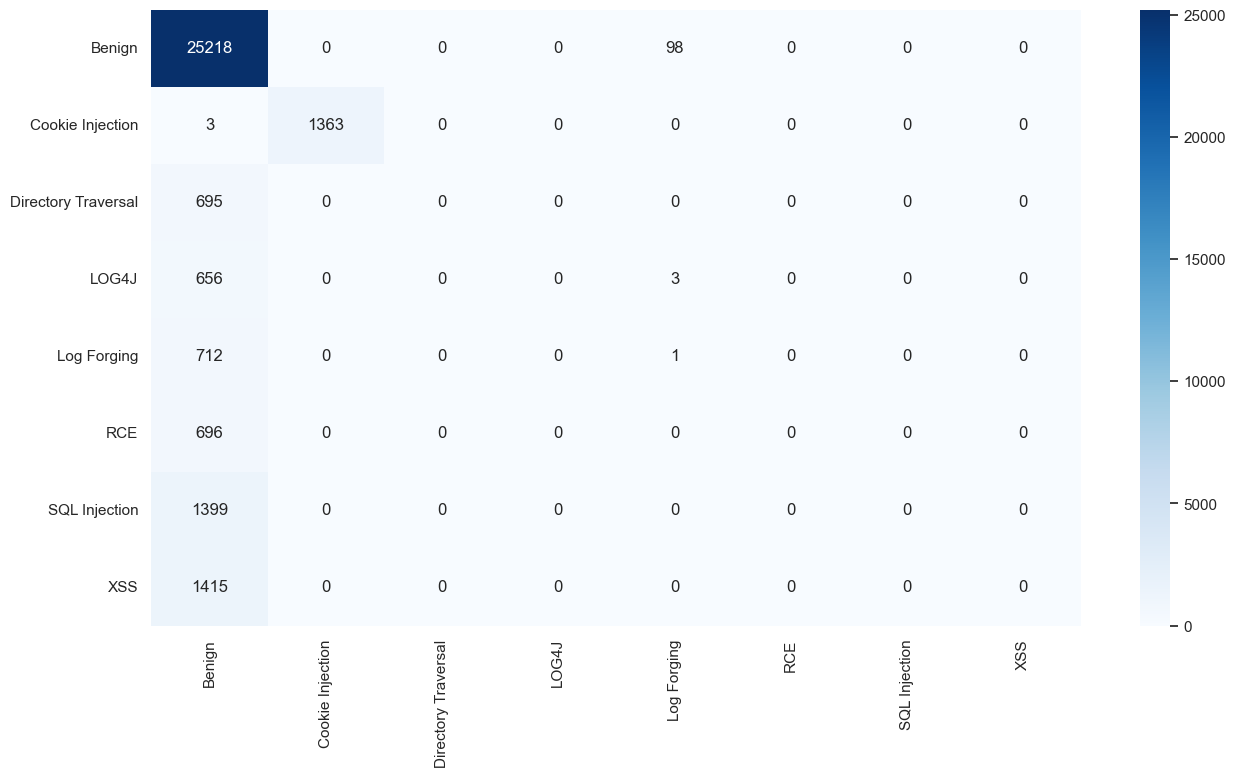

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
# We choose our model of choice and set it's hyper parameters you can change anything
abc = AdaBoostClassifier()

#  The random_state in these algorithms controls the randomness involved during the node splitting process by searching for the best feature
parameters = {"random_state": [None,10,20,30,40,50,100,200,300],
              "n_estimators": [50,100,200,300,400]
             }

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
abc = GridSearchCV(abc, parameters)
# Train Model
abc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
abc = abc.best_estimator_
ResultPrintout(abc)

### Model 5- ExtraTreesClassifier() 

[('Benign', 118115), ('Cookie Injection', 6376), ('Directory Traversal', 3244), ('LOG4J', 3074), ('Log Forging', 3324), ('RCE', 3248), ('SQL Injection', 6525), ('XSS', 6602)]
                     precision    recall  f1-score   support

             Benign    0.96323   0.97053   0.96687     25316
   Cookie Injection    1.00000   0.99780   0.99890      1366
Directory Traversal    0.72947   0.65180   0.68845       695
              LOG4J    0.89275   0.46737   0.61355       659
        Log Forging    0.70774   0.91024   0.79632       713
                RCE    0.97301   0.98420   0.97857       696
      SQL Injection    0.80801   0.77913   0.79330      1399
                XSS    0.95455   0.97951   0.96686      1415

           accuracy                        0.94560     32259
          macro avg    0.87859   0.84257   0.85035     32259
       weighted avg    0.94576   0.94560   0.94396     32259



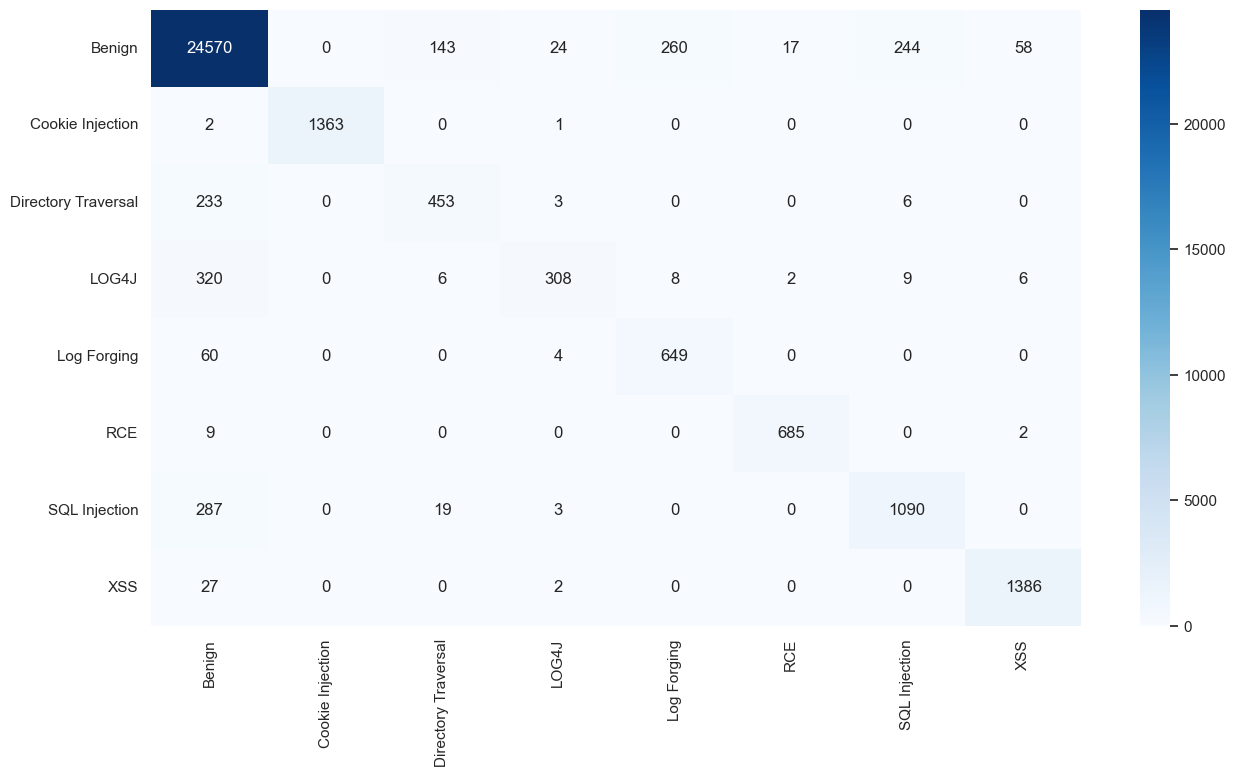

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
from sklearn.ensemble import ExtraTreesClassifier
#n_estimatorsint, default=100: The number of base estimators in the ensemble.
# We choose our model of choice and set it's hyper parameters you can change anything
etc = ExtraTreesClassifier()

#  The random_state in these algorithms controls the randomness involved during the node splitting process by searching for the best feature
parameters = { "n_estimators": [50,100,200,300,400],
              "min_samples_split":[2,3,4]
             }

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
etc = GridSearchCV(etc, parameters)
# Train Model
etc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
etc = etc.best_estimator_
ResultPrintout(etc)

### Model 6- HistGradientBoostingClassifier() 

[('Benign', 118115), ('Cookie Injection', 6376), ('Directory Traversal', 3244), ('LOG4J', 3074), ('Log Forging', 3324), ('RCE', 3248), ('SQL Injection', 6525), ('XSS', 6602)]
                     precision    recall  f1-score   support

             Benign    0.96580   0.97942   0.97256     25316
   Cookie Injection    1.00000   0.99780   0.99890      1366
Directory Traversal    0.95981   0.58417   0.72630       695
              LOG4J    0.96324   0.39757   0.56284       659
        Log Forging    0.70816   0.97335   0.81985       713
                RCE    1.00000   1.00000   1.00000       696
      SQL Injection    0.87427   0.85990   0.86703      1399
                XSS    0.95799   0.99929   0.97821      1415

           accuracy                        0.95580     32259
          macro avg    0.92866   0.84894   0.86571     32259
       weighted avg    0.95780   0.95580   0.95289     32259



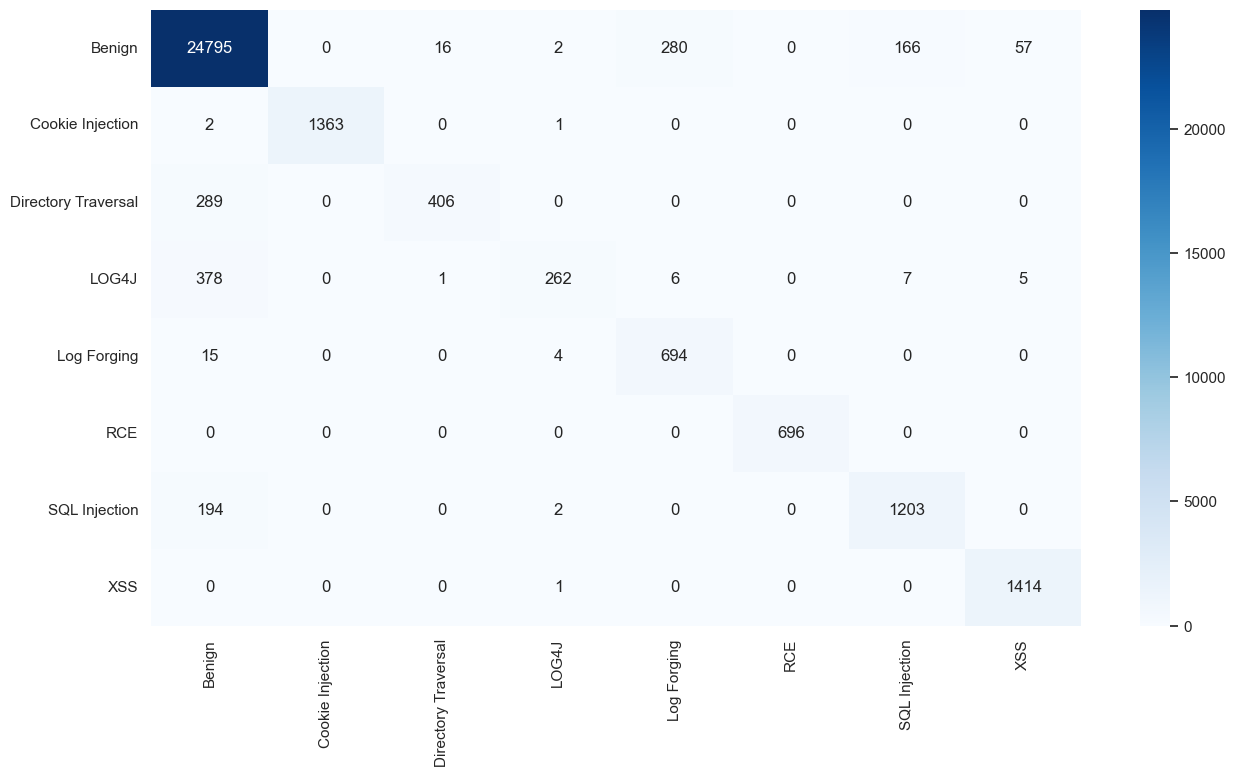

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import HistGradientBoostingClassifier
# We choose our model of choice and set it's hyper parameters you can change anything
hgbc = HistGradientBoostingClassifier()

#  The random_state in these algorithms controls the randomness involved during the node splitting process by searching for the best feature
parameters = {"min_samples_leaf": [1,2,3,4,5,6,7,8,9,10],
              "max_iter":[20,50,100,200]
             }

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid
hgbc = GridSearchCV(hgbc, parameters)
# Train Model
hgbc.fit(X_train, y_train)

# # Check data balance and variety
print(sorted(Counter(y_train).items()))
hgbc = hgbc.best_estimator_
ResultPrintout(hgbc)

# Choosing the best model

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
best=0
m=None
models={clf,dtc,gbc,abc,etc,hgbc}
for i in models:
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = i.predict(X_test)
    true_labels = y_test
    if accuracy_score(true_labels, predictions)*100 > best:
        best=accuracy_score(true_labels, predictions)*100
        m=i
print(best)
print(m)
    

95.80892154127531
GradientBoostingClassifier(n_estimators=350)


# Test

In [18]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model 
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
for column in test_df.columns[test_df.isna().any()].tolist():
    #df.drop(column, axis=1, inplace=True)
    test_df[column] = test_df[column].fillna('None')
test_df = vectorize_df(test_df)

# Predict with your model
X = test_df[features_list].to_numpy()
predictions = m.predict(X)
print(m)

GradientBoostingClassifier(n_estimators=350)


# Save your predictions

In [19]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')